In [44]:
import pandas as pd
import numpy as np

In [20]:
lmao=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-1/nifty_sensex_close_data/data/Sensex_2011_to_2023(separated).csv')
df=lmao[['Date','M&M.NS(close)']]

df

,Date,M&M.NS(close)
0,2011-01-03,354.620422
1,2011-01-04,351.783600
2,2011-01-05,347.190735
3,2011-01-06,347.280792
4,2011-01-07,333.344513
...,...,...
3199,2023-12-22,1634.250000
3200,2023-12-26,1662.250000
3201,2023-12-27,1687.949951
3202,2023-12-28,1734.449951


In [21]:
n1=6
n2=45
n3=9
for i in range (len(df)):
    df.loc[:,'SMAa'] = df.loc[i-n1+1:i+1,'M&M.NS(close)'].mean()
    df.loc[:,'SMAb'] = df.loc[i-n2+1:i+1,'M&M.NS(close)'].mean()
    df.loc[:,'SMAc'] = df.loc[i-n3+1:i+1,'M&M.NS(close)'].mean()
for i in range(n1):
    df.loc[i,'SMAa'] = None
for i in range(n2):
    df.loc[i,'SMAb'] = None
for i in range(n3):
    df.loc[i,'SMAc'] = None

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_63903/3199779392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'SMAa'] = df.loc[i-n1+1:i+1,'M&M.NS(close)'].mean()
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_63903/3199779392.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'SMAb'] = df.loc[i-n2+1:i+1,'M&M.NS(close)'].mean()
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_63903/3199779392.py:7: SettingWithCopyWarning: 
A value is trying to be set

In [45]:
smooth=2
alpha1=smooth
alpha1 = alpha1/ (n1 + 1.0)
beta1  = 1 - alpha1
alpha2=smooth
alpha2 = alpha2/ (n2 + 1.0)
beta2  = 1 - alpha2
alpha3=smooth
alpha3 = alpha3/ (n3 + 1.0)
beta3  = 1 - alpha3
df['EMAa']=df['SMAa']
df['EMAb']=df['SMAb']
df['EMAc']=df['SMAc']

df.loc[n1 + 1, 'EMAa'] = np.mean((df.loc[n1 + 1,'M&M.NS(close)'] * alpha1) + (df.loc[n1, 'EMAa'] * beta1)) 
for i in range(n1 + 2, len(df)):
    df.loc[i, 'EMAa'] = np.mean(df.loc[i,'M&M.NS(close)'] * alpha1)+(df.loc[i-1, 'EMAa']*beta1)

df.loc[n2 + 1, 'EMAb'] = np.mean((df.loc[n2 + 1,'M&M.NS(close)'] * alpha2) + (df.loc[n2, 'EMAb'] * beta2)) 
for i in range(n2 + 2, len(df)):
    df.loc[i, 'EMAb'] = np.mean(df.loc[i,'M&M.NS(close)'] * alpha2)+(df.loc[i-1, 'EMAb']*beta2)

df.loc[n3 + 1, 'EMAc'] = np.mean((df.loc[n3 + 1,'M&M.NS(close)'] * alpha3) + (df.loc[n3, 'EMAc'] * beta3)) 
for i in range(n3 + 2, len(df)):
    df.loc[i, 'EMAc'] = np.mean(df.loc[i,'M&M.NS(close)'] * alpha3)+(df.loc[i-1, 'EMAc']*beta3)



/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_63903/2969053849.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMAa']=df['SMAa']
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_63903/2969053849.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMAb']=df['SMAb']
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_63903/2969053849.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [47]:
df[:15]

,Date,M&M.NS(close),SMAa,SMAb,SMAc,EMAa,EMAb,EMAc
0,2011-01-03,354.620422,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-04,351.783600,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-05,347.190735,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-06,347.280792,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-07,333.344513,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-01-10,328.053772,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-01-11,330.935547,1680.358317,NaN,NaN,1680.358317,NaN,NaN
7,2011-01-12,338.275146,1680.358317,NaN,NaN,1296.905983,NaN,NaN
8,2011-01-13,332.173859,1680.358317,NaN,NaN,1021.268233,NaN,NaN
9,2011-01-14,333.006866,1680.358317,NaN,1682.138875,824.622128,NaN,1682.138875


In [24]:

trades = pd.DataFrame(columns=[['Date','Order Type','Price']])


In [25]:
for i in range(n3+1,len(df.index)):
    if df.loc[i-1,'EMAa'] > df.loc[i-1,'EMAb'] and df.loc[i-1,'EMAa'] > df.loc[i-1,'EMAc']:
        trades.loc[len(trades.index)]  = [df.loc[i,'Date'],'Buy',df.loc[i,'M&M.NS(close)']]
    if df.loc[i-1,'EMAa'] < df.loc[i-1,'EMAb'] and df.loc[i-1,'EMAa'] < df.loc[i-1,'EMAc']:
        trades.loc[len(trades.index)]  = [df.loc[i,'Date'],'Sell',df.loc[i,'M&M.NS(close)']]

In [26]:
trades

,Date,Order Type,Price
0,2011-03-16,Sell,297.186737
1,2011-03-17,Sell,295.475739
2,2011-03-18,Sell,284.173645
3,2011-03-21,Sell,288.676453
4,2011-03-22,Sell,294.530212
...,...,...,...
2359,2023-12-19,Buy,1699.349976
2360,2023-12-20,Buy,1646.949951
2361,2023-12-21,Buy,1633.849976
2362,2023-12-28,Buy,1734.449951


In [27]:
trades['Order Type']=trades['Order Type'].astype('str')
if trades.loc[0]['Order Type']=='Sell':
    trades=trades[1:]
if trades.loc[len(trades.index)]['Order Type']=='Buy':
    trades=trades[:-1]

trades.reset_index(inplace=True)
trades

,index,Date,Order Type,Price
0,1,2011-03-17,Sell,295.475739
1,2,2011-03-18,Sell,284.173645
2,3,2011-03-21,Sell,288.676453
3,4,2011-03-22,Sell,294.530212
4,5,2011-03-23,Sell,290.927887
...,...,...,...,...
2357,2358,2023-12-18,Buy,1710.800049
2358,2359,2023-12-19,Buy,1699.349976
2359,2360,2023-12-20,Buy,1646.949951
2360,2361,2023-12-21,Buy,1633.849976


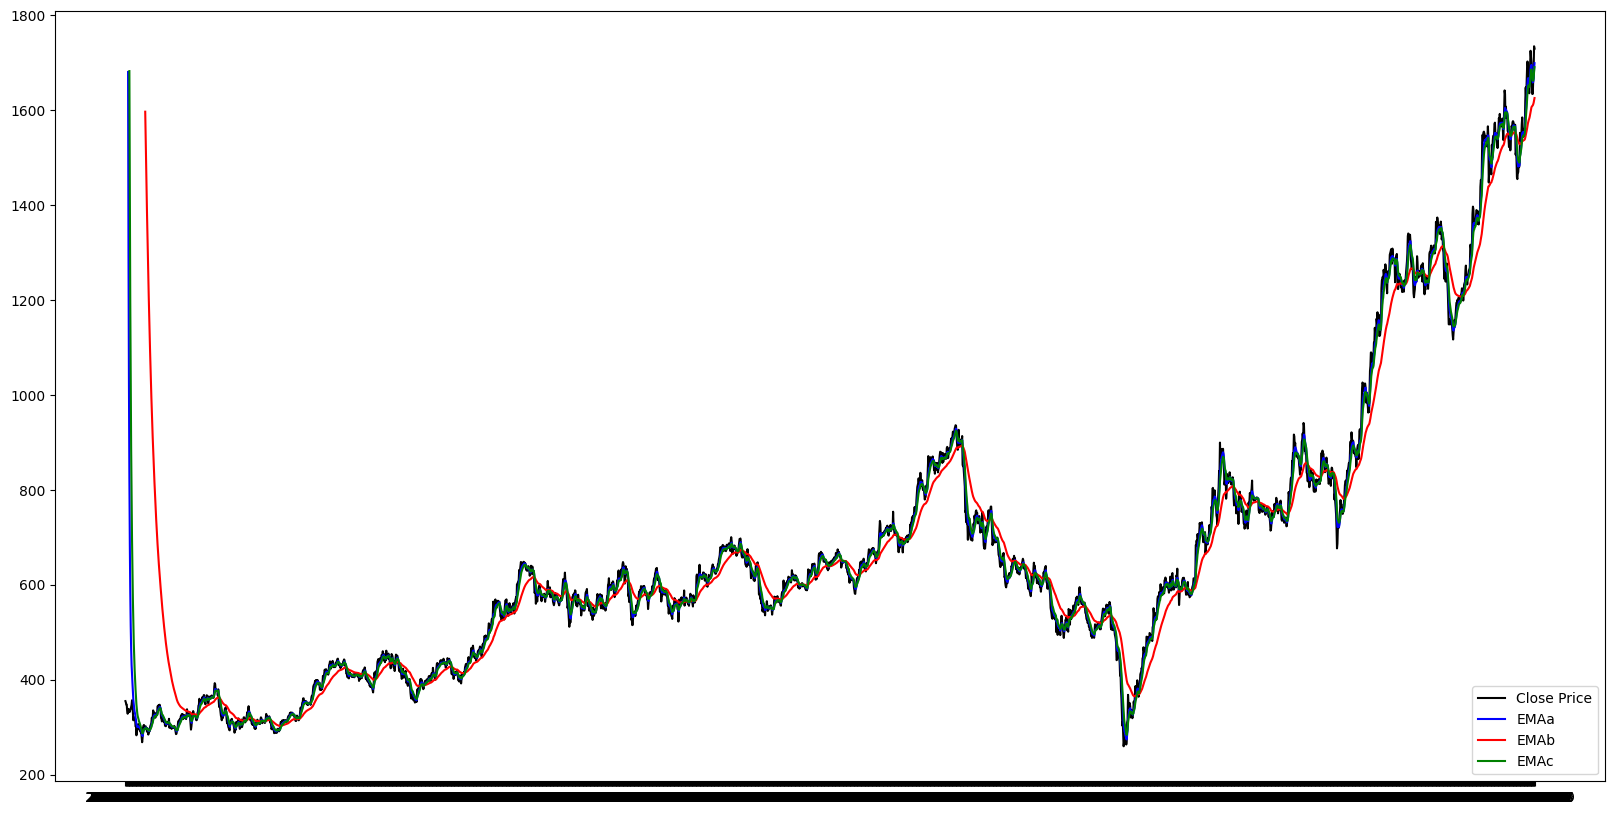

In [29]:
#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['M&M.NS(close)'],label='Close Price',color='black')
plt.plot(df['Date'],df['EMAa'],label='EMAa',color='blue')
plt.plot(df['Date'],df['EMAb'],label='EMAb',color='red')
plt.plot(df['Date'],df['EMAc'],label='EMAc',color='green')
plt.legend()
plt.show()